In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read data from CSV file
df = pd.read_csv('unidad_verdejante-anomaly.csv', parse_dates=['date'])

# Set 'date' as the index
df.set_index('date', inplace=True)

In [2]:
def train_predict_evaluate(df, target_column, n_estimators=100, random_state=42):
    # Prepare the features and target variable
    X = df.drop(columns=[target_column])
    y = df[target_column]

    # Create and train the Random Forest model
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state)
    model.fit(X, y)

    # Make predictions on the entire dataset
    predictions = model.predict(X)

    # Evaluate the model
    mse = mean_squared_error(y, predictions)
    print(f'Mean Squared Error for {target_column}: {mse}')

    return y, predictions

In [3]:
columns_to_predict = [col for col in df.columns if col != 'date']

# Initialize a DataFrame to store all predicted values
forecast_df = pd.DataFrame(index=df.index)

# Loop through all columns and perform training, prediction, and evaluation
for target_column in columns_to_predict:
    y, predictions = train_predict_evaluate(df, target_column)
    forecast_df[f'Actual_{target_column}'] = y
    forecast_df[f'Predicted_{target_column}'] = predictions

Mean Squared Error for temperature_cleaned: 1.2250665096138138
Mean Squared Error for light_cleaned: 119.39123726780028
Mean Squared Error for airHumidity_cleaned: 1.0447106010034044
Mean Squared Error for humidity_cleaned: 0.41313532447575485


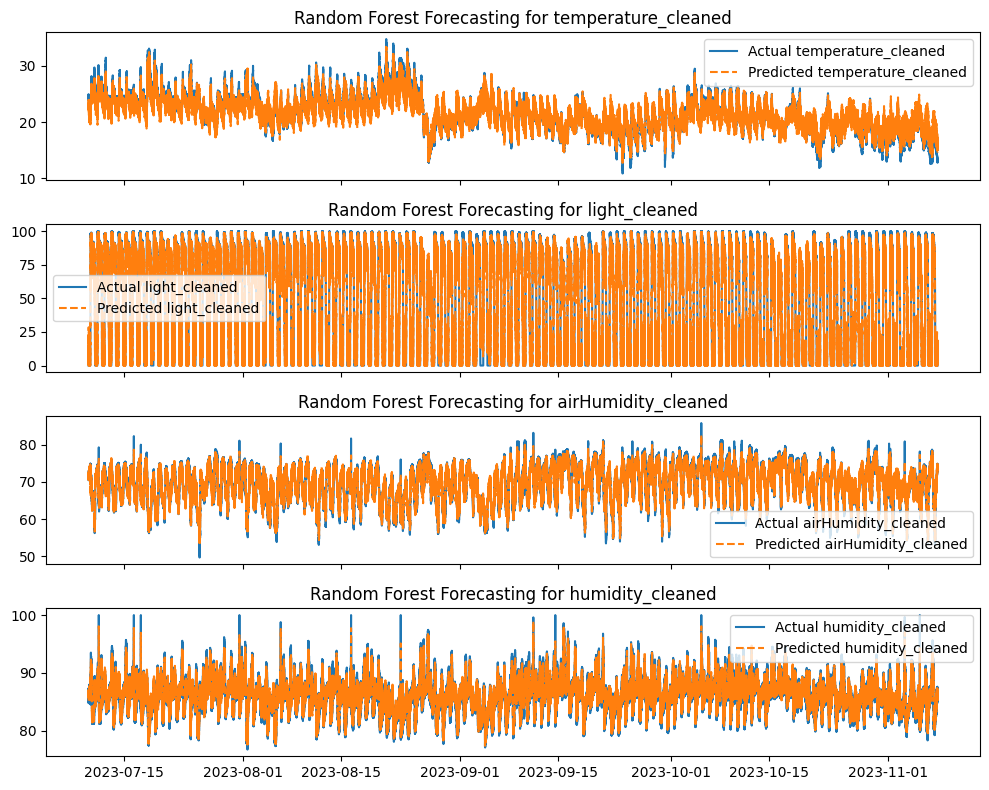

In [6]:
# Plot all columns as subplots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 8), sharex=True)

for i, target_column in enumerate(columns_to_predict):
    axes[i].plot(df.index, forecast_df[f'Actual_{target_column}'], label=f'Actual {target_column}')
    axes[i].plot(df.index, forecast_df[f'Predicted_{target_column}'], label=f'Predicted {target_column}', linestyle='dashed')
    axes[i].set_title(f'Random Forest Forecasting for {target_column}')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [5]:
forecast_df.to_csv('unidad_verdejante-forecast.csv')